# Project Analisis Data: Bike Sharing Dataset

* Nama: Aryadi Belo Rerung
* Cohort ID: A428YAM073
* Cohort Group: A-01 

## Pertanyaan Analisis

1. Bagaimana tren pertumbuhan penjualan perusahaan dalam 2 tahun terakhir?
2. Berapa besar kontribusi pengguna terdaftar dibandingkan pengguna kasual dalam total penyewaan?
3. Bagaimana Pengaruh Musim Terhadap Jumlah Penyewaan Sepeda?

## Menyiapkan semua library yang dibutuhkan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Setelah persiapan selesai, tahap berikutnya adalah pengumpulan data yang diperlukan.
#### Load Tabel Day

In [6]:
day_df = pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load Tabel hour

In [7]:
hour_df = pd.read_csv("hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data
#### Menilai Table day_df

In [8]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df.
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
# mengecek missing value di dataset hour_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# memeriksa duplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Menampilkan statistik deskriptif untuk kolom numerik dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Table hour_df

In [12]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df.
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
# mengecek missing value di dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
# memeriksa duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
# Menampilkan statistik deskriptif untuk kolom numerik dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data

Pada proses ini akan dilakukan beberapa hal yaitu:
1. Menghapus kolom instant dan windspeed karena tidak memberikan nilai tambah dalam analisis bisnis. Kolom instant dan windspeed tidak memiliki relevansi dengan pertanyaan bisnis yang akan analisis.
2. Mengganti nama beberapa kolom agar lebih mudah dibaca dan dipahami.
3. Mengubah tipe data pada kolom dteday dari object menjadi datetime untuk mempermudah analisis data berbasis waktu.

## Membersihkan data day_df
### Dropping

In [16]:
# Menghaous kolom yang tidak diperlukan
day_df.drop(['windspeed'], axis = 1, inplace= True)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


#### Rename

In [17]:
day_df.rename(columns={'dteday':'dateday','yr':'year','mnth':'month','weekday':'day_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','hum':'humidity','cnt':'count'},inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,day_of_week,workingday,weather_situation,temp,atemp,humidity,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


## Membersihkan data hour_df
### Dropping

In [18]:
hour_df.drop(['windspeed'], axis = 1, inplace= True)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


### Rename
#### Mengubah nama kolom untuk meningkatkan keterbacaan

In [19]:
hour_df.rename(columns={'dteday':'dateday','yr':'year','mnth':'month','hr':'hour','weekday':'day_of_week', 'weathersit':'weather_situation','hum':'humidity','cnt':'count'},inplace=True)

hour_df.head()

,instant,dateday,season,year,month,hour,holiday,day_of_week,workingday,weather_situation,temp,atemp,humidity,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


## Mengubah Tipe Data
### object to datetime

In [20]:
day_df['dateday'] = pd.to_datetime(day_df['dateday'])
hour_df['dateday'] = pd.to_datetime(hour_df['dateday'])

### int to category

In [21]:
columns = ['year', 'season', 'month', 'holiday', 'day_of_week', 'workingday', 'weather_situation']
 
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

In [22]:
# Konversi season
day_df['season'] = day_df['season'].cat.rename_categories({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['season'] = hour_df['season'].cat.rename_categories({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Konversi month
day_df['month'] = day_df['month'].cat.rename_categories({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                                           7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
hour_df['month'] = hour_df['month'].cat.rename_categories({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                                             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Konversi weather_situation
day_df['weather_situation'] = day_df['weather_situation'].cat.rename_categories({1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Severe Weather'})
hour_df['weather_situation'] = hour_df['weather_situation'].cat.rename_categories({1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Severe Weather'})

# Konversi weekday
day_df['day_of_week'] = day_df['day_of_week'].cat.rename_categories({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
hour_df['day_of_week'] = hour_df['day_of_week'].cat.rename_categories({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

# Konversi year
day_df['year'] = day_df['year'].cat.rename_categories({0: '2011', 1: '2012'})
hour_df['year'] = hour_df['year'].cat.rename_categories({0: '2011', 1: '2012'})

# Menghitung Humidity
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

In [23]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   dateday            731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   day_of_week        731 non-null    category      
 7   workingday         731 non-null    category      
 8   weather_situation  731 non-null    category      
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  casual             731 non-null    int64         
 13  registered         731 non-null    int64         
 14  count     

In [24]:
hour_df.describe(include="all")

,instant,dateday,season,year,month,hour,holiday,day_of_week,workingday,weather_situation,temp,atemp,humidity,casual,registered,count
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jul,NaN,0.0,Sat,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,62.722884,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,48.000000,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,63.000000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,78.000000,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,100.000000,367.000000,886.000000,977.000000


In [25]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

## Exploratory Data Analysis (EDA)
### Explor data day_df dan hour_df

In [26]:
# Menampilkan ringkasan statistik dari dataset day_df
day_df.describe(include="all")

,instant,dateday,season,year,month,holiday,day_of_week,workingday,weather_situation,temp,atemp,humidity,casual,registered,count,humidity_category
count,731.000000,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sun,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,Ideal
freq,NaN,NaN,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,3410.000000,6946.000000,8714.000000,NaN


In [27]:
day_df.groupby(by='season', observed=True).agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Winter   729.112360  3999.050562  8555    22  4728.162921

In [28]:
# Menampilkan ringkasan statistik dari dataset hour_df
hour_df.describe(include="all")

,instant,dateday,season,year,month,hour,holiday,day_of_week,workingday,weather_situation,temp,atemp,humidity,casual,registered,count,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Fall,2012,Jul,NaN,0.0,Sat,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,62.722884,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,48.000000,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,63.000000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,78.000000,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,100.000000,367.000000,886.000000,977.000000,NaN


In [29]:
# rata-rata penyewaan berdasarkan jam
hour_df.groupby(by="hour").agg({
    "count": ["mean"]
})

,count
,mean
hour,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649


Berdasarkan table tersebut, rata-rata jumlah penyewaan sepeda tertinggi terjadi pada pukul 17.00, sementara penyewaan terendah terjadi pada pukul 04.00.

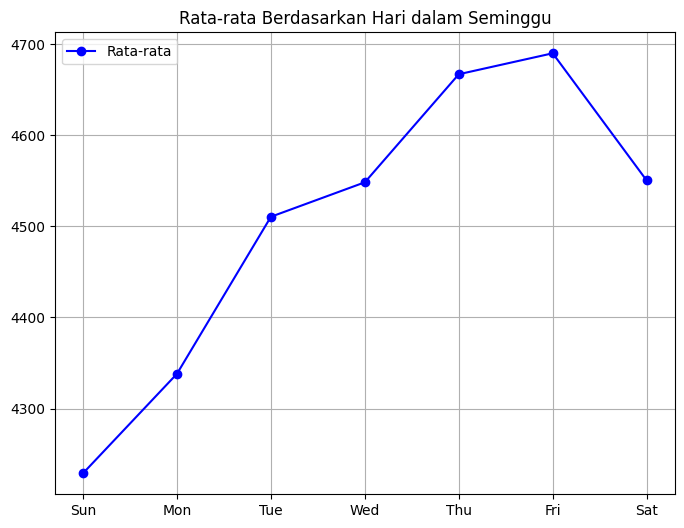

In [30]:
# Grouping data berdasarkan hari dalam seminggu
grouped_day_of_week = day_df.groupby(by='day_of_week', observed=True).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

plt.figure(figsize=(8, 6))
plt.plot(grouped_day_of_week.index, grouped_day_of_week[('count', 'mean')], marker='o', color='blue', label='Rata-rata')
plt.title('Rata-rata Berdasarkan Hari dalam Seminggu')
plt.grid(True)
plt.legend()
plt.show()


Dari grafik di atas terlihat bahwa rata-rata jumlah penyewa terbanyak di hari Jumat

In [31]:
day_df.groupby(by="year", observed=False).agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Berdasarkan visualisasi di atas, jumlah penyewaan oleh anggota jauh lebih tinggi dibandingkan non-anggota. Pada tahun 2011, anggota tercatat melakukan 995851 penyewaan, sementara non-anggota hanya 247252. sedangkan Pada tahun 2012, anggota tercatat melakukan 1676811 penyewaan, sementara non-anggota hanya 372765

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren pertumbuhan penjualan perusahaan dalam 2 tahun terakhir?

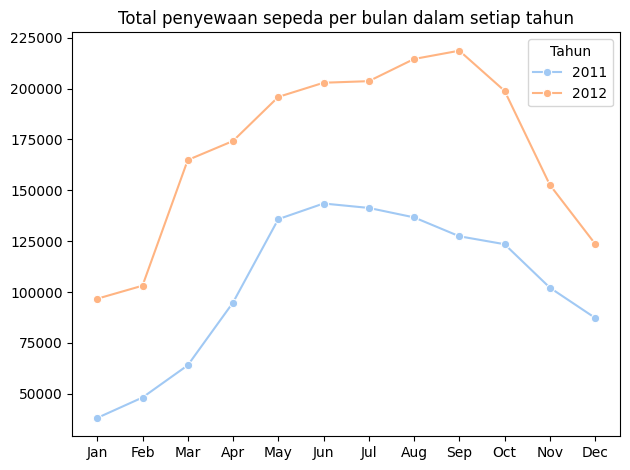

In [32]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month", "year"], observed=False).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="pastel",  # Ganti dengan "coolwarm", "viridis", atau warna lain jika mau
    marker="o"
)

plt.title("Total penyewaan sepeda per bulan dalam setiap tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Tahun 2012 mencatat penyewaan tertinggi sepanjang tahun, dengan puncaknya di September dan terendah di Januari. Sementara itu, pada 2011, puncak terjadi di Juni, dengan Januari tetap menjadi bulan terendah.

### Pertanyaan 2: Berapa besar kontribusi pengguna terdaftar dibandingkan pengguna kasual dalam total penyewaan?

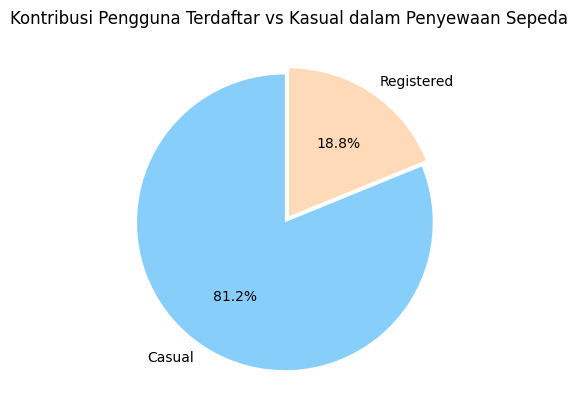

In [33]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat Pie Chart
plt.pie(
    [total_registered, total_casual], 
    labels=labels, 
    autopct='%1.1f%%', 
    colors=['#87CEFA', '#FFDAB9'], 
    startangle=90, 
    explode=(0.05, 0)
)
plt.title('Kontribusi Pengguna Terdaftar vs Kasual dalam Penyewaan Sepeda')
plt.show()

Pengguna terdaftar menyumbang 81,2% dari total penyewaan, sedangkan pengguna yang belum terdaftar (kasual) hanya sebesar 18,8%.

### Pertanyaan 3: Bagaimana Pengaruh Musim Terhadap Jumlah Penyewaan Sepeda?

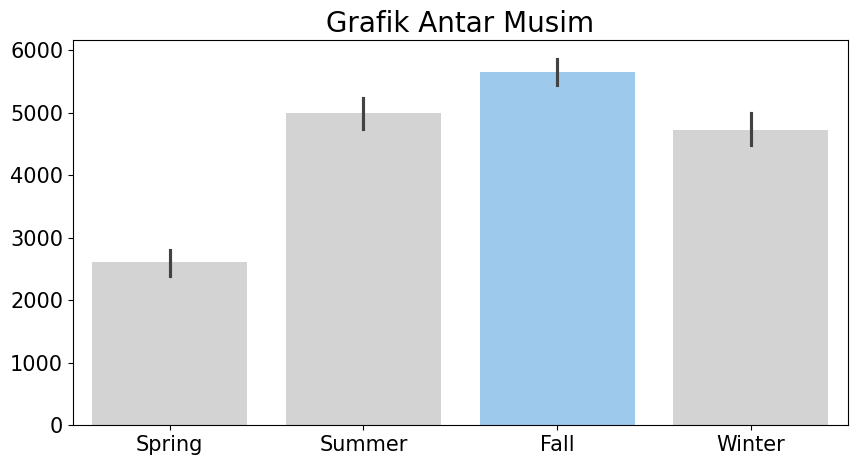

In [39]:
# Menentukan warna untuk setiap batang pada grafik batang
colors = ["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]

# Membuat figure dan axis dengan ukuran 10x5
fig, ax = plt.subplots(figsize=(10, 5))

# Membuat grafik batang untuk jumlah penyewaan berdasarkan musim
sns.barplot(
        y="count", 
        x="season", 
        hue="season",
        data=day_df.sort_values(by="season", ascending=False), 
        palette=colors,
        legend=False, 
        ax=ax  
    )

# Mengatur judul grafik dengan ukuran font 20
ax.set_title("Grafik Antar Musim", loc="center", fontsize=20)

# Menghapus label pada sumbu X dan Y
ax.set_ylabel(None)
ax.set_xlabel(None)

# Menyesuaikan ukuran label pada sumbu X dan Y
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Menampilkan grafik
plt.show()

Musim dengan jumlah penyewaan terbanyak adalah musim gugur (Fall).

## Kesimpulan

* Kesimpulan pertanyaan 1: Visualisasi ini menunjukkan perbedaan pola penyewaan sepeda antara tahun 2011 dan 2012. Pada tahun 2011, jumlah penyewaan tertinggi terjadi di bulan Juni, sementara bulan Januari mencatat jumlah terendah. Sementara itu, tahun 2012 mencapai puncak penyewaan di bulan September, dengan bulan Januari tetap menjadi periode terendah. Secara keseluruhan, total penyewaan sepeda di tahun 2012 lebih tinggi dibandingkan tahun 2011.
  
* Kesimpulan pertanyaan 2: Pengguna terdaftar mendominasi jumlah penyewaan sepeda dengan kontribusi sebesar 81.2%, sedangkan pengguna kasual hanya menyumbang 18.8% dari total penyewaan. Perbedaan ini menunjukkan bahwa mayoritas penyewaan dilakukan oleh pelanggan yang telah memiliki keanggotaan.

* Kesimpulan pertanyaan 3: Jumlah penyewaan sepeda mencapai puncaknya pada musim gugur (Fall), diikuti oleh musim panas (Summer), menjadikannya periode dengan tingkat penyewaan tertinggi dibandingkan musim lainnya. Hal ini menunjukkan bahwa faktor musiman memiliki dampak signifikan terhadap pola penggunaan sepeda.

## Penerapan teknik analisis lanjutan
### Analisis Clustering

In [32]:
hour_df.groupby(by="humidity_category").agg({
    "count": ["count"]})

,count
,count
humidity_category,
Ideal,5505
Terlalu Lembab,8356
Terlalu kering,3518


### RFM Analysis
RFM Analysis berikut digunakan untuk memahami perilaku pelanggan berdasarkan dua faktor utama:

* Recency: Seberapa baru pelanggan terakhir kali berinteraksi dengan bisnis.
* Frequency: Menunjukkan seberapa sering pelanggan melakukan interaksi.
* Monetary: Jumlah uang yang telah mereka belanjakan.

In [33]:
# Menentukan tanggal terbaru dalam dataset
current_date = hour_df['dateday'].max()

# Menghitung RFM
rfm_df = hour_df.groupby('registered').agg(
    Recency=('dateday', lambda x: (current_date - x.max()).days),
    Frequency=('instant', 'count'),
    Monetary=('count', 'sum')
).reset_index()

# Menampilkan hasil
print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


In [34]:
day_df.to_csv("day_clean.csv", index=False)

In [35]:
hour_df.to_csv("hour_clean.csv", index=False)